In [1]:
#Importing the data file on 311 NYC system Department of Housing Preservation and Development 
import pandas as pd
file="D:\Python\edx\Capstone project\data_311_correct.csv"
df=pd.read_csv(file)
df.head()

,Unnamed: 0,Unique Key,Created Date,Closed Date,Complaint Type,Location Type,Incident Zip,Incident Address,Street Name,Address Type,City,Status,Resolution Description,Borough,Latitude,Longitude
0,0,45531130,02/02/2020 06:09:17 AM,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,10019.0,426 WEST 52 STREET,WEST 52 STREET,ADDRESS,NEW YORK,Open,The following complaint conditions are still o...,MANHATTAN,40.765132,-73.988993
1,1,45529784,02/02/2020 02:15:24 PM,NaN,UNSANITARY CONDITION,RESIDENTIAL BUILDING,11204.0,1751 67 STREET,67 STREET,ADDRESS,BROOKLYN,Open,The following complaint conditions are still o...,BROOKLYN,40.618484,-73.992673
2,2,45527528,02/02/2020 02:27:41 AM,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,11372.0,87-15 37 AVENUE,37 AVENUE,ADDRESS,Jackson Heights,Open,The following complaint conditions are still o...,QUEENS,40.750269,-73.879432
3,3,45530329,02/02/2020 12:13:18 PM,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,10458.0,2405 SOUTHERN BOULEVARD,SOUTHERN BOULEVARD,ADDRESS,BRONX,Open,The following complaint conditions are still o...,BRONX,40.853773,-73.881558
4,4,45528814,02/02/2020 01:59:44 PM,NaN,APPLIANCE,RESIDENTIAL BUILDING,11209.0,223 78 STREET,78 STREET,ADDRESS,BROOKLYN,Open,The following complaint conditions are still o...,BROOKLYN,40.629745,-74.030533


In [2]:
#Looking at the dataset information
#Objective: Which type of complaint should the Department of Housing 
#Preservation and Development of New York City focus on first?
#Q1. What is the total number of complaints that exist in the dataset?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019843 entries, 0 to 6019842
Data columns (total 16 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Unnamed: 0              int64  
 1   Unique Key              int64  
 2   Created Date            object 
 3   Closed Date             object 
 4   Complaint Type          object 
 5   Location Type           object 
 6   Incident Zip            float64
 7   Incident Address        object 
 8   Street Name             object 
 9   Address Type            object 
 10  City                    object 
 11  Status                  object 
 12  Resolution Description  object 
 13  Borough                 object 
 14  Latitude                float64
 15  Longitude               float64
dtypes: float64(3), int64(2), object(11)
memory usage: 734.8+ MB


In [3]:
# This exercise is focused on complaints, so let's see few details about 'Complaint Type'
df['Complaint Type'].unique()

array(['HEAT/HOT WATER', 'UNSANITARY CONDITION', 'APPLIANCE', 'GENERAL',
       'ELECTRIC', 'PLUMBING', 'PAINT/PLASTER', 'WATER LEAK', 'SAFETY',
       'DOOR/WINDOW', 'OUTSIDE BUILDING', 'ELEVATOR', 'FLOORING/STAIRS',
       'Unsanitary Condition', 'HPD Literature Request', 'HEATING',
       'PAINT - PLASTER', 'Safety', 'Electric', 'General', 'Appliance',
       'GENERAL CONSTRUCTION', 'NONCONST', 'CONSTRUCTION', 'AGENCY',
       'STRUCTURAL', 'VACANT APARTMENT', 'Outside Building', 'Plumbing',
       'Mold'], dtype=object)

In [4]:
# Lets see if there is any NaN or null value in this column
df['Complaint Type'].isnull().sum()

0

In [5]:
# Count number 
df_comp=df['Complaint Type'].value_counts()
df_comp # frequency of each complaint type

HEAT/HOT WATER            1261574
HEATING                    887850
PLUMBING                   711130
GENERAL CONSTRUCTION       500863
UNSANITARY CONDITION       451643
PAINT - PLASTER            361257
PAINT/PLASTER              346438
ELECTRIC                   307310
NONCONST                   260890
DOOR/WINDOW                205278
WATER LEAK                 193631
GENERAL                    151308
FLOORING/STAIRS            137402
APPLIANCE                  112831
HPD Literature Request      52824
SAFETY                      51529
OUTSIDE BUILDING             7142
ELEVATOR                     6725
Unsanitary Condition         5499
CONSTRUCTION                 5078
General                      1163
Safety                        424
STRUCTURAL                     16
Plumbing                       11
AGENCY                          9
Outside Building                6
VACANT APARTMENT                6
Appliance                       4
Electric                        1
Mold          

In [6]:
# Q2. How many differnt Complaint Types can you find in the dataset, including duplicates entries of the same type?
len(df_comp)

30

In [7]:
#Q3. How many Elevator complaints can you find in the dataset? 
df_comp

HEAT/HOT WATER            1261574
HEATING                    887850
PLUMBING                   711130
GENERAL CONSTRUCTION       500863
UNSANITARY CONDITION       451643
PAINT - PLASTER            361257
PAINT/PLASTER              346438
ELECTRIC                   307310
NONCONST                   260890
DOOR/WINDOW                205278
WATER LEAK                 193631
GENERAL                    151308
FLOORING/STAIRS            137402
APPLIANCE                  112831
HPD Literature Request      52824
SAFETY                      51529
OUTSIDE BUILDING             7142
ELEVATOR                     6725
Unsanitary Condition         5499
CONSTRUCTION                 5078
General                      1163
Safety                        424
STRUCTURAL                     16
Plumbing                       11
AGENCY                          9
Outside Building                6
VACANT APARTMENT                6
Appliance                       4
Electric                        1
Mold          

In [8]:
# Combining results of heating and heat/hot water together and Electric and ELECTRIC to have total sum of these category
# Before 2014, this dataset is using HEATING label but after 2014, the label changed as "HEATING/HOT WATER". 
#So, we need to change "HEATING" labels as "HEATING/HOT WATER" and analyze them together.
import numpy as np
df['Complaint Type'] = np.where(df['Complaint Type']=='HEATING','HEAT/HOT WATER',df['Complaint Type'])
df['Complaint Type'] = np.where(df['Complaint Type']=='ELECTRIC','Electric',df['Complaint Type'])

In [9]:
df_comp_mod=df['Complaint Type'].value_counts()
df_comp_mod # frequency of each complaint type
#Q4. How many Electric complaints can you find in the dataset?
#Q5. Using 800,000 as a threshold, what complaint type(s) do you
#recommend the Department of Housing Preservation and Development of New York City address first?

HEAT/HOT WATER            2149424
PLUMBING                   711130
GENERAL CONSTRUCTION       500863
UNSANITARY CONDITION       451643
PAINT - PLASTER            361257
PAINT/PLASTER              346438
Electric                   307311
NONCONST                   260890
DOOR/WINDOW                205278
WATER LEAK                 193631
GENERAL                    151308
FLOORING/STAIRS            137402
APPLIANCE                  112831
HPD Literature Request      52824
SAFETY                      51529
OUTSIDE BUILDING             7142
ELEVATOR                     6725
Unsanitary Condition         5499
CONSTRUCTION                 5078
General                      1163
Safety                        424
STRUCTURAL                     16
Plumbing                       11
AGENCY                          9
Outside Building                6
VACANT APARTMENT                6
Appliance                       4
Mold                            1
Name: Complaint Type, dtype: int64

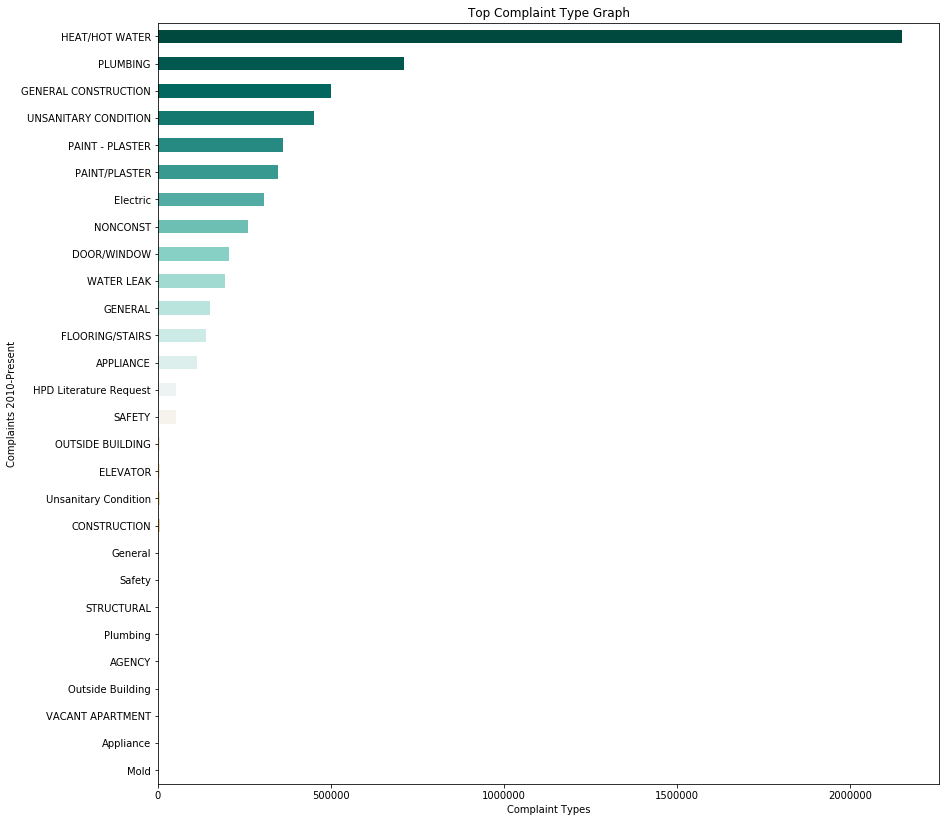

In [10]:
# Visualization for  above data
import matplotlib.pyplot as plt
import seaborn as sns
df_comp_mod.sort_values(ascending = True, inplace =True)
df_comp_mod.plot(kind='barh',figsize = (14,14), color=sns.color_palette('BrBG', len(df_comp_mod)))
plt.xlabel('Complaint Types')
plt.ylabel('Complaints 2010-Present')
plt.title('Top Complaint Type Graph')
plt.show()